In [1]:
import tensorflow as tf
import keras
import cv2

In [2]:
# #########################################################
# prg1
# 下載與讀取Mnist資料集

from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()



In [3]:

# #########################################################
# prg2

from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)



60000 60000
(60000, 28, 28) (60000,)


60000 60000
(60000, 28, 28) (60000,)


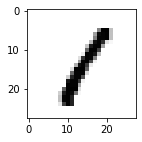

1


In [4]:


# #########################################################
# prg3

#prg3 顯示訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()

show_image(train_feature[3])  #顯示訓練資料第1個數字

print(train_label[3])    #顯示第1個訓練資料圖片真實值



60000 60000
(60000, 28, 28) (60000,)


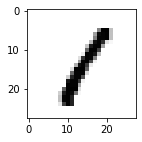

1


In [5]:
# #########################################################
# prg4

#prg4 顯示多張訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()
	
	# 顯示多張資料副程式，最多顯示 25張
show_image(train_feature[3])  #顯示訓練資料第1個數字

print(train_label[3])    #顯示第1個訓練資料圖片真實值


# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()



In [6]:
# #########################################################
# Prg5
# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])



(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [7]:

# #########################################################
# Prg6
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
# #########################################################
# Prg7
# One-Hot Encoding

import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


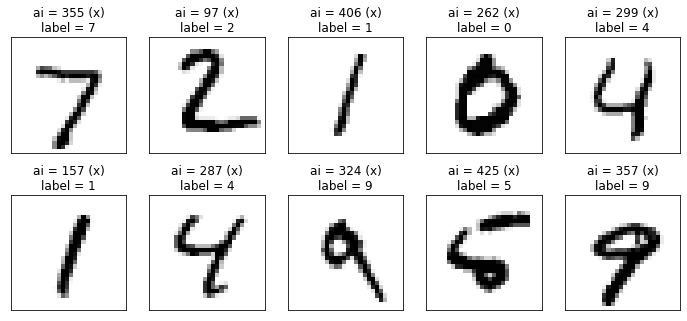

In [9]:

# #########################################################
# Prg8
#建立模型
import matplotlib.pyplot as pit
from keras.models import Sequential
from keras.layers import Dense

#建立模型
from keras.models import Sequential
model = Sequential()

#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)


In [10]:
# #########################################################
# Prg9
# 將模型儲存在 .HDF5檔案中

model.save('Mnist_mlp_model.h5')
print("Mnist_mlp_model.h5 模型儲存完畢")
del model

#載入模型
#load_model('Mnist_ml-Model.h5')


Mnist_mlp_model.h5 模型儲存完畢


載入模型 Mnist_mlp_model.h5


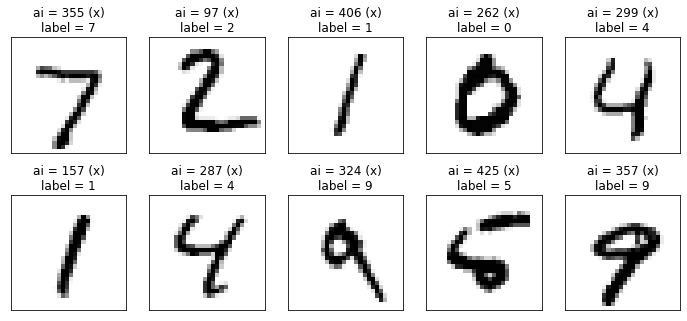

In [11]:
# #########################################################

#Prg10 載入預先訓練好的模型

import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_mlp_model.h5")
model = load_model('Mnist_mlp_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)


['imagedata\\1.jpg', 'imagedata\\2_1.jpg', 'imagedata\\3_1.jpg', 'imagedata\\4_1.jpg', 'imagedata\\5_1.jpg', 'imagedata\\6_1.jpg', 'imagedata\\7.jpg', 'imagedata\\7_1.jpg', 'imagedata\\7_2.jpg', 'imagedata\\9_1.jpg', 'imagedata\\9_2.jpg', 'imagedata\\9_3.jpg']
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 

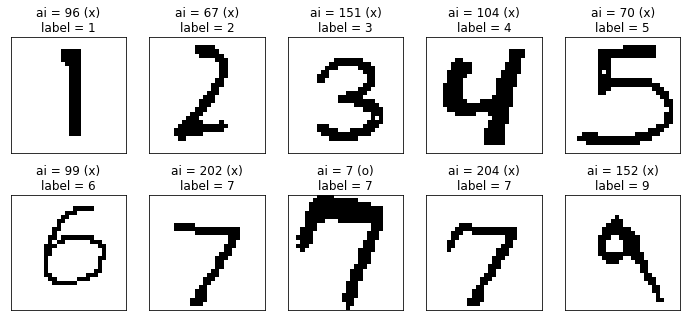

In [12]:
# #########################################################
#Prg11 載入預先訓練好的模型

import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立測試特徵集、測試標籤	    
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
print(files)

for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
    
test_feature=np.array(test_feature) #把串列轉為矩陣
test_label=np.array(test_label) #把串列轉為矩陣

print(test_feature)
print(test_label)

#將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_mlp_model.h5")
model = load_model('Mnist_mlp_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)